In [1]:
from analysis.utils import *
from analysis.probabilities import *
from analysis.interdependence import *
from analysis.simulation import * 
from datetime import datetime
import matplotlib.pyplot as plt
from graphviz import Digraph
import math
import re
import ast
import pandas as pd
import numpy as np

In [7]:
# test of randomly generated, stable AR model
var = VAR(m=2, order=1)
var.generate(2)
print(var)

steps = 2000
timeseries = var.simulate(steps)

print(timeseries)
labels = labels = [f'X{i}' for i in range(var.m)]

VAR(1): X_t = C_1 * X_t-1 + N_t
C_1 = 
array([[ 0.15788665,  0.81921005],
       [ 0.        , -0.89      ]])

[[ 0.18329896  0.19330141]
 [-0.03045673 -0.09911075]
 [-0.10995501 -0.19023966]
 ...
 [-0.13847856 -0.60882146]
 [-0.52544612  0.74263068]
 [ 0.41938127 -0.29871319]]


In [8]:
# exact DI values
var.directed_information_graph(plot=False)

array([[0.05527364, 0.        ],
       [0.77128242, 0.8368604 ]])

In [8]:
# knn estimated di values
k=50

knn_euclidean = KNN(metric='euclidean')
print(directed_information_graph(timeseries, estimator=knn_euclidean))

#knn_manhattan = KNN(metric='manhattan')
#print(directed_information_graph(timeseries, estimator=knn_manhattan)

[[-0.02096154 -0.02458578 -0.01787043]
 [-0.01577037 -0.0208977  -0.01952097]
 [-0.00994725  0.04239666 -0.01199288]]


In [12]:
# kde estimaed di values
kde = KDE(kernel='exponential', bandwidth='silverman') 
directed_information_graph(timeseries, estimator=kde)

array([[ 1.24306477, -0.22569073, -0.15829172],
       [-0.28781244,  1.83141698, -0.2772692 ],
       [ 0.10037192, -0.23611272,  1.79864734]])

In [5]:
nvar = NVAR(m=2, order=1)
nvar.generate(2)
print(nvar.functions_str[0])
timeseries = nvar.simulate(10000)
print(timeseries)
nvar.directed_information_graph(plot=False)

[['**0.833' '']
 ['tanh' '']]
[[-1.1418043  -0.56047742]
 [-1.16547171 -0.96387745]
 [-1.21502381 -0.66910352]
 ...
 [ 0.46431216  0.65682215]
 [ 0.48544343  0.35553816]
 [ 0.64021861  0.56816092]]


array([[1.40479474, 1.08997737],
       [0.        , 0.        ]])

In [5]:
directed_information_graph(timeseries)

array([[-1.71282463,  0.82038829],
       [-0.17245451, -2.25636623]])

In [2]:
apple = 'AAPL'
microsoft = 'MSFT'
google = 'GOOG'
tickers = [apple, microsoft, google]
# start_date = datetime(2015, 10, 15)
# end_date = datetimte(2023, 10, 15)
# download_tickers(tickers, start_date, end_date)

apple_df = pd.read_csv(f'data/{apple}.csv')
microsoft_df = pd.read_csv(f'data/{microsoft}.csv')
google_df = pd.read_csv(f'data/{google}.csv')

In [6]:
# test of density for one random variable
returns = np.array([apple_df['Returns'], microsoft_df['Returns']]).transpose()

# bandwidth = 'silverman' | 'scott' | float
kde = KDE(kernel='exponential', bandwidth='silverman')
knn = KNN(k5)

pdf_kde = pdf(kde, returns)
pdf_knn = pdf(knn, returns)

# print density distributions
x_vals = np.linspace(-4, 4, 1000)
#y_knn = [pdf_knn([x]) for x in x_vals]
#y_kde = [pdf_kde([x]) for x in x_vals]

pdf_knn([0.5, 0.5])

# plt.plot(x_vals, y_kde, label='KDE', color='blue')
# plt.plot(x_vals, y_knn, label='KNN', color='red')
# plt.legend()
# plt.show()

[[0.04613279 0.05857413 0.07322361 0.08488113 0.08523372]]


0.08706496339757255

0.021776722525108032
0.023402240786512138


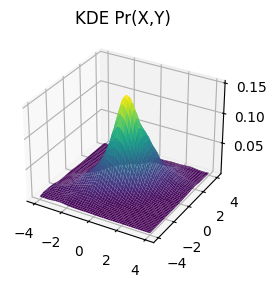

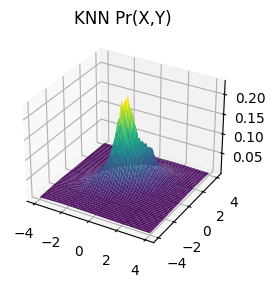

In [9]:
# test of density for multiple random variable
returns = np.array([apple_df['Returns'], google_df['Returns']]).transpose()

pdf_kde = pdf(kde, returns)
pdf_knn = pdf(knn, returns)

print(pdf_kde([2, 2]))
print(pdf_knn([2, 2]))

values = np.linspace(-4, 4, 100)
print3D(values, values, pdf_kde, 'KDE Pr(X,Y)')
print3D(values, values, pdf_knn, 'KNN Pr(X,Y)')

In [9]:
def percentage_correct(real, estimate, threshold):
    dim = len(real)
    total = dim * dim
    correct = 0
    total = 0
    for i in range(dim):
        for j in range(dim):
            if real[i, j] > 0 and estimate[i, j] >= threshold:
                correct += 1
                total += 1
            if real[i, j] > 0 and estimate[i, j] < threshold:
                total += 1
            
    return correct / total if total != 0 else None

def cut_irrelevant(x, threshold):
    for i in range(len(x)):
        for j in range(len(x[0])):
            if x[i, j] < threshold:
                x[i, j] = 0
                
    return x

In [9]:
# tests for different T, m=2
m = 2
n_pred = 1

real_di_2_t = []
knn_di_2_t = []
knn_di_2_sqrt_t = []
kde_di_2_t = []

for t in range(100, 1001, 100):
    real_di_i = []
    knn_di_i = []
    knn_di_sqrt_i = []
    kde_di_i = []

    knn = KNN()
    knn_sqrt = KNN(k=math.sqrt(t))
    kde = KDE()
    
    for i in range(100):
        var = VAR(m, order=1)
        var.generate(n_pred)
        timeseries = var.simulate(t)
    
        real_di = var.directed_information_graph().tolist()
        estimated_di_knn = directed_information_graph(timeseries, estimator=knn).tolist()
        estimated_di_knn_sqrt = directed_information_graph(timeseries, estimator=knn_sqrt).tolist()
        estimated_di_kde = directed_information_graph(timeseries, estimator=kde).tolist()
        
        real_di_i.append(real_di)
        knn_di_i.append(estimated_di_knn)
        knn_di_sqrt_i.append(estimated_di_knn_sqrt)
        kde_di_i.append(estimated_di_kde)

    
    real_di_2_t.append(real_di_i)
    knn_di_2_t.append(knn_di_i)
    knn_di_2_sqrt_t.append(knn_di_sqrt_i)
    kde_di_2_t.append(kde_di_i)

df_2_t = pd.DataFrame()
df_2_t['real'] = real_di_2_t
df_2_t['knn'] = knn_di_2_t
df_2_t['knn_sqrt'] = knn_di_2_sqrt_t
df_2_t['kde'] = kde_di_2_t
df_2_t.to_csv('knn_kde_m_2_ts.csv', index=False)

t=100 done
t=200 done
t=300 done
t=400 done
t=500 done
t=600 done
t=700 done
t=800 done
t=900 done
t=1000 done


NameError: name 'df_2' is not defined

In [ ]:
# tests for different T, m=5
m = 5
n_pred = 3

real_di_5_t = []
knn_di_5_t = []
knn_di_5_sqrt_t = []
kde_di_5_t = []

for t in range(100, 1001, 100):
    real_di_i = []
    knn_di_i = []
    knn_di_sqrt_i = []
    kde_di_i = []

    knn = KNN()
    knn_sqrt = KNN(k=math.sqrt(t))
    kde = KDE()
    
    for i in range(100):
        var = VAR(m, order=1)
        var.generate(n_pred)
        timeseries = var.simulate(t)
    
        real_di = var.directed_information_graph().tolist()
        estimated_di_knn = directed_information_graph(timeseries, estimator=knn).tolist()
        estimated_di_knn_sqrt = directed_information_graph(timeseries, estimator=knn_sqrt).tolist()
        estimated_di_kde = directed_information_graph(timeseries, estimator=kde).tolist()
        
        real_di_i.append(real_di)
        knn_di_i.append(estimated_di_knn)
        knn_di_sqrt_i.append(estimated_di_knn_sqrt)
        kde_di_i.append(estimated_di_kde)

    
    real_di_5_t.append(real_di_i)
    knn_di_5_t.append(knn_di_i)
    knn_di_5_sqrt_t.append(knn_di_sqrt_i)
    kde_di_5_t.append(kde_di_i)

df_5_t = pd.DataFrame()
df_5_t['real'] = real_di_5_t
df_5_t['knn'] = knn_di_5_t
df_5_t['knn_sqrt'] = knn_di_5_sqrt_t
df_5_t['kde'] = kde_di_5_t
df_5_t.to_csv('knn_kde_m_5_ts.csv', index=False)

In [ ]:
# tests for different T, m=2
m = 10
n_pred = 5

real_di_2_t = []
knn_di_2_t = []
knn_di_2_sqrt_t = []
kde_di_2_t = []

for t in range(100, 1001, 100):
    real_di_i = []
    knn_di_i = []
    knn_di_sqrt_i = []
    kde_di_i = []

    knn = KNN()
    knn_sqrt = KNN(k=math.sqrt(t))
    kde = KDE()
    
    for i in range(100):
        var = VAR(m, order=1)
        var.generate(n_pred)
        timeseries = var.simulate(t)
    
        real_di = var.directed_information_graph().tolist()
        estimated_di_knn = directed_information_graph(timeseries, estimator=knn).tolist()
        estimated_di_knn_sqrt = directed_information_graph(timeseries, estimator=knn_sqrt).tolist()
        estimated_di_kde = directed_information_graph(timeseries, estimator=kde).tolist()
        
        real_di_i.append(real_di)
        knn_di_i.append(estimated_di_knn)
        knn_di_sqrt_i.append(estimated_di_knn_sqrt)
        kde_di_i.append(estimated_di_kde)

    
    real_di_10_t.append(real_di_i)
    knn_di_10_t.append(knn_di_i)
    knn_di_10_sqrt_t.append(knn_di_sqrt_i)
    kde_di_10_t.append(kde_di_i)

df_10_t = pd.DataFrame()
df_10_t['real'] = real_di_10_t
df_10_t['knn'] = knn_di_10_t
df_10_t['knn_sqrt'] = knn_di_10_sqrt_t
df_10_t['kde'] = kde_di_10_t
df_10_t.to_csv('knn_kde_m_10_ts.csv', index=False)

In [ ]:
# tests for different T, m=3
m = 3
n_pred = 2

real_di_3_t = []
knn_di_3_t = []
knn_di_3_sqrt_t = []

for t in range(100, 1001, 100):
    real_di_i = []
    knn_di_i = []
    knn_di_sqrt_i = []
    
    knn = KNN()
    knn_sqrt = KNN(k=math.sqrt(t))

    for i in range(100):
        var = VAR(m, order=1)
        var.generate(n_pred)
        timeseries = var.simulate(t)
    
        real_di = var.directed_information_graph().tolist()
        estimated_di_knn = directed_information_graph(timeseries, estimator=knn).tolist()
        estimated_di_knn_sqrt = directed_information_graph(timeseries, estimator=knn_sqrt).tolist()
        
        real_di_i.append(real_di)
        knn_di_i.append(estimated_di_knn)
        knn_di_sqrt_i.append(estimated_di_knn_sqrt)

    
    real_di_3_t.append(real_di_i)
    knn_di_3_t.append(knn_di_i)
    knn_di_3_sqrt_t.append(knn_di_sqrt_i)


df_3_t = pd.DataFrame()
df_3_t['real'] = real_di_3_t
df_3_t['knn'] = knn_di_3_t
df_3_t['knn_sqrt'] = knn_di_3_sqrt_t
df_3_t.to_csv('knn_m_3_ts.csv', index=False)

In [ ]:
# tests for different T, m=4
m = 4
n_pred = 2

real_di_3_t = []
knn_di_3_t = []
knn_di_3_sqrt_t = []

for t in range(100, 1001, 100):
    real_di_i = []
    knn_di_i = []
    knn_di_sqrt_i = []
    
    knn = KNN()
    knn_sqrt = KNN(k=math.sqrt(t))

    for i in range(100):
        var = VAR(m, order=1)
        var.generate(n_pred)
        timeseries = var.simulate(t)
    
        real_di = var.directed_information_graph().tolist()
        estimated_di_knn = directed_information_graph(timeseries, estimator=knn).tolist()
        estimated_di_knn_sqrt = directed_information_graph(timeseries, estimator=knn_sqrt).tolist()
        
        real_di_i.append(real_di)
        knn_di_i.append(estimated_di_knn)
        knn_di_sqrt_i.append(estimated_di_knn_sqrt)

    
    real_di_4_t.append(real_di_i)
    knn_di_4_t.append(knn_di_i)
    knn_di_4_sqrt_t.append(knn_di_sqrt_i)


df_4_t = pd.DataFrame()
df_4_t['real'] = real_di_4_t
df_4_t['knn'] = knn_di_4_t
df_4_t['knn_sqrt'] = knn_di_4_sqrt_t
df_4_t.to_csv('knn_m_4_ts.csv', index=False)

In [ ]:
# tests for different T, m=6
m = 6
n_pred = 3

real_di_6_t = []
knn_di_6_t = []
knn_di_6_sqrt_t = []

for t in range(100, 1001, 100):
    real_di_i = []
    knn_di_i = []
    knn_di_sqrt_i = []
    
    knn = KNN()
    knn_sqrt = KNN(k=math.sqrt(t))

    for i in range(100):
        var = VAR(m, order=1)
        var.generate(n_pred)
        timeseries = var.simulate(t)
    
        real_di = var.directed_information_graph().tolist()
        estimated_di_knn = directed_information_graph(timeseries, estimator=knn).tolist()
        estimated_di_knn_sqrt = directed_information_graph(timeseries, estimator=knn_sqrt).tolist()
        
        real_di_i.append(real_di)
        knn_di_i.append(estimated_di_knn)
        knn_di_sqrt_i.append(estimated_di_knn_sqrt)

    
    real_di_6_t.append(real_di_i)
    knn_di_6_t.append(knn_di_i)
    knn_di_6_sqrt_t.append(knn_di_sqrt_i)


df_6_t = pd.DataFrame()
df_6_t['real'] = real_di_6_t
df_6_t['knn'] = knn_di_6_t
df_6_t['knn_sqrt'] = knn_di_6_sqrt_t
df_6_t.to_csv('knn_m_6_ts.csv', index=False)

In [ ]:
# tests for different T, m=7
m = 7
n_pred = 4

real_di_7_t = []
knn_di_7_t = []
knn_di_7_sqrt_t = []

for t in range(100, 1001, 100):
    real_di_i = []
    knn_di_i = []
    knn_di_sqrt_i = []
    
    knn = KNN()
    knn_sqrt = KNN(k=math.sqrt(t))

    for i in range(100):
        var = VAR(m, order=1)
        var.generate(n_pred)
        timeseries = var.simulate(t)
    
        real_di = var.directed_information_graph().tolist()
        estimated_di_knn = directed_information_graph(timeseries, estimator=knn).tolist()
        estimated_di_knn_sqrt = directed_information_graph(timeseries, estimator=knn_sqrt).tolist()
        
        real_di_i.append(real_di)
        knn_di_i.append(estimated_di_knn)
        knn_di_sqrt_i.append(estimated_di_knn_sqrt)

    
    real_di_7_t.append(real_di_i)
    knn_di_7_t.append(knn_di_i)
    knn_di_7_sqrt_t.append(knn_di_sqrt_i)


df_7_t = pd.DataFrame()
df_7_t['real'] = real_di_7_t
df_7_t['knn'] = knn_di_7_t
df_7_t['knn_sqrt'] = knn_di_7_sqrt_t
df_7_t.to_csv('knn_m_7_ts.csv', index=False)

In [ ]:
# tests for different T, m=8
m = 8
n_pred = 4

real_di_8_t = []
knn_di_8_t = []
knn_di_8_sqrt_t = []

for t in range(100, 1001, 100):
    real_di_i = []
    knn_di_i = []
    knn_di_sqrt_i = []
    
    knn = KNN()
    knn_sqrt = KNN(k=math.sqrt(t))

    for i in range(100):
        var = VAR(m, order=1)
        var.generate(n_pred)
        timeseries = var.simulate(t)
    
        real_di = var.directed_information_graph().tolist()
        estimated_di_knn = directed_information_graph(timeseries, estimator=knn).tolist()
        estimated_di_knn_sqrt = directed_information_graph(timeseries, estimator=knn_sqrt).tolist()
        
        real_di_i.append(real_di)
        knn_di_i.append(estimated_di_knn)
        knn_di_sqrt_i.append(estimated_di_knn_sqrt)

    
    real_di_8_t.append(real_di_i)
    knn_di_8_t.append(knn_di_i)
    knn_di_8_sqrt_t.append(knn_di_sqrt_i)


df_8_t = pd.DataFrame()
df_8_t['real'] = real_di_8_t
df_8_t['knn'] = knn_di_8_t
df_8_t['knn_sqrt'] = knn_di_8_sqrt_t
df_8_t.to_csv('knn_m_8_ts.csv', index=False)

In [ ]:
# tests for different T, m=9
m = 9
n_pred = 5

real_di_9_t = []
knn_di_9_t = []
knn_di_9_sqrt_t = []

for t in range(100, 1001, 100):
    real_di_i = []
    knn_di_i = []
    knn_di_sqrt_i = []
    
    knn = KNN()
    knn_sqrt = KNN(k=math.sqrt(t))

    for i in range(100):
        var = VAR(m, order=1)
        var.generate(n_pred)
        timeseries = var.simulate(t)
    
        real_di = var.directed_information_graph().tolist()
        estimated_di_knn = directed_information_graph(timeseries, estimator=knn).tolist()
        estimated_di_knn_sqrt = directed_information_graph(timeseries, estimator=knn_sqrt).tolist()
        
        real_di_i.append(real_di)
        knn_di_i.append(estimated_di_knn)
        knn_di_sqrt_i.append(estimated_di_knn_sqrt)

    
    real_di_9_t.append(real_di_i)
    knn_di_9_t.append(knn_di_i)
    knn_di_9_sqrt_t.append(knn_di_sqrt_i)


df_9_t = pd.DataFrame()
df_9_t['real'] = real_di_9_t
df_9_t['knn'] = knn_di_9_t
df_9_t['knn_sqrt'] = knn_di_9_sqrt_t
df_9_t.to_csv('knn_m_9_ts.csv', index=False)